# Interactivity and Selections

In [3]:
# Altair's interactivity and grammar of selections will be covered in this section, specifically 
# There are three basic types of selections available:

# Interval Selection: alt.selection_interval()
# Single Selection: alt.selection_single()
# Multi Selection: alt.selection_multi()

# And few subparts of the above like:
# Conditional encodings
# Scales
# Filters
# Domains

In [4]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Basic Interactions: Panning, Zooming, Tooltips

In [6]:
# For the above interactions we use interactive() shortcut method and the tooltip encoding

In [7]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


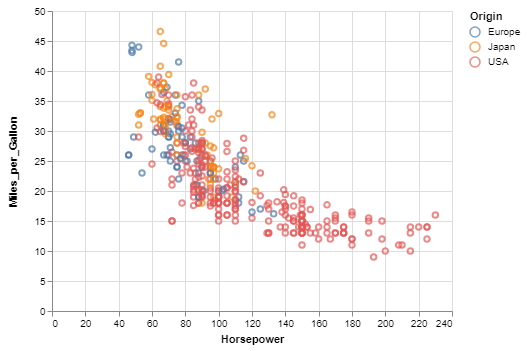

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin',
    tooltip='Name'
).interactive()
# If we hover over a point it will bring up a tooltip with the name of the car model, 
# and clicking/dragging/scrolling will pan and zoom on the plot.


# More Sophisticated Interaction: Selections

In [11]:
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


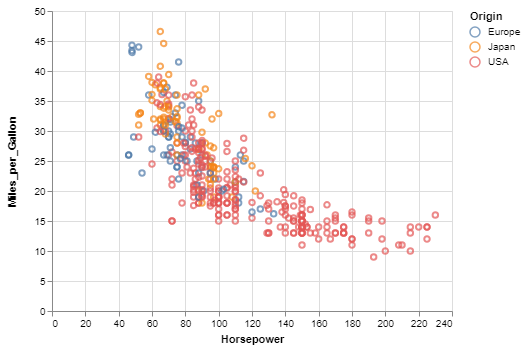

In [13]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin'
)

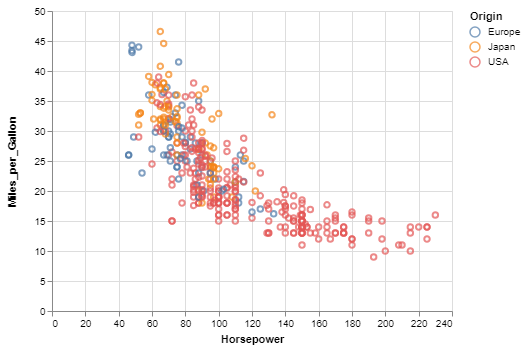

In [17]:
# To add a selection behaviour to chart so that we can select a part of it , we create a select object
# and add it to the charts properties
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin'
).properties(
    selection=interval
)

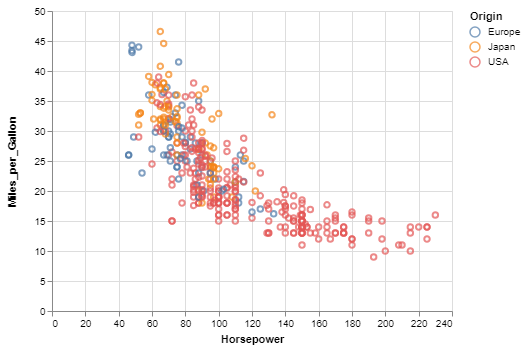

In [20]:
# The most common use of a selection is to highlight points by conditioning their color on the result of the selection.
# To do that we use alt.condition
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)
# Now if we highlight ,since we have conditioned on the color of Origin . The higlighted selected points will get colored as 
# per Origin and the rest will be lightgray
# The alt.condition function takes three arguments: a selection object,
# a value to be applied to points within the selection, and a value to be applied to points outside the selection

# Either x or y direction selection or both

In [22]:
# The alt.selection_interval() function takes a number of additional arguments;
# for example, by specifying encodings, we can control whether the selection covers x, y, or both:


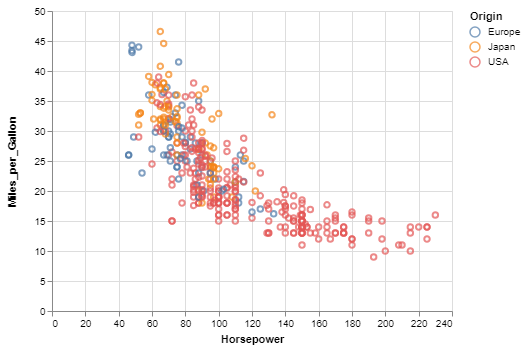

In [24]:
interval = alt.selection_interval(encodings=['x'])

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

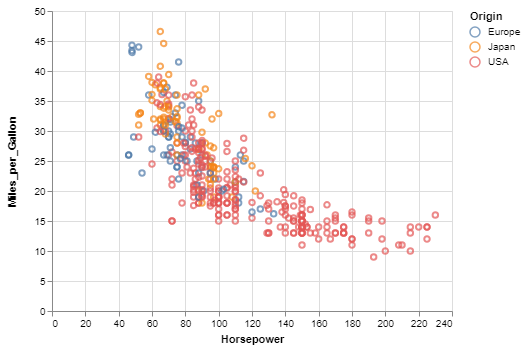

In [25]:
interval = alt.selection_interval(encodings=['y'])

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

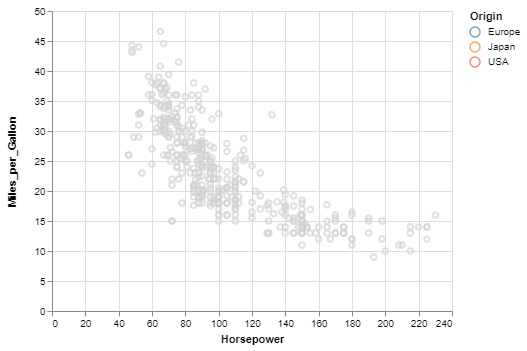

In [27]:
# The empty argument lets us control whether empty selections contain all values, or none of the values; 
# with empty='none' points are grayed-out by default:
interval = alt.selection_interval(empty='none')

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

# Single Selection

In [ ]:
#  alt.selection_single() helps in selecting  points one at a a time rather than a window of points .

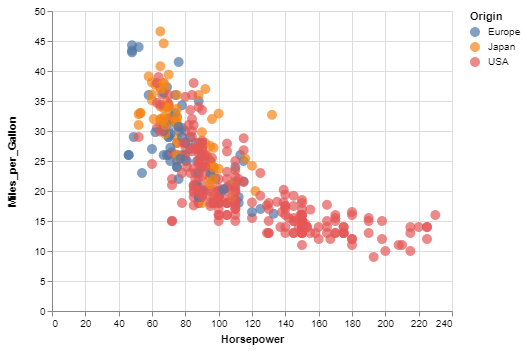

In [36]:
single = alt.selection_single()
# To increase the size of points we use mark_circle(size=100)
alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(single, 'Origin', alt.value('lightgray'))
).properties(
    selection=single
)

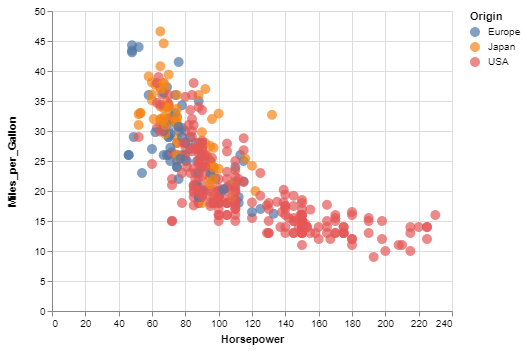

In [37]:
single = alt.selection_single(on='mouseover', nearest=True)
# The highlighting will turn on only when mouse is hovered on it and the nearest point to the cursor gets highlighted .rest are
# graycoloured.
alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(single, 'Origin', alt.value('lightgray'))
).properties(
    selection=single
)

# Multi Selection

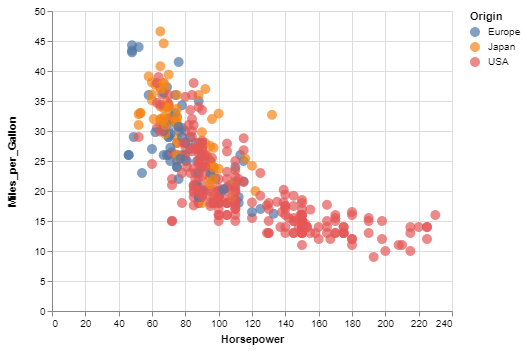

In [40]:
multi = alt.selection_multi()
# multiple points be selected at once, while holding the shift key and clicking on each point:

alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(multi, 'Origin', alt.value('lightgray'))
).properties(
    selection=multi
)

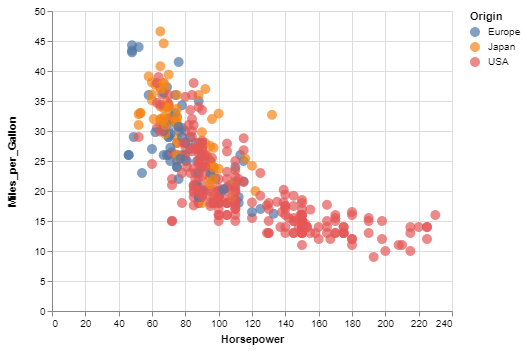

In [41]:
multi = alt.selection_multi(on='mouseover', nearest=True)
# on and nearest also work for multi selections: shift and hover your cursor rest highlighting is taken care off
alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(multi, 'Origin', alt.value('lightgray'))
).properties(
    selection=multi
)

######################### Selection Binding

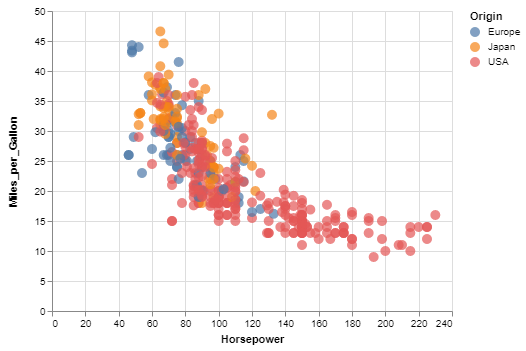

In [43]:
bind = alt.selection_interval(bind='scales')

alt.Chart(cars).mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
).properties(
    selection=bind
)

# Binding Scales to Other Domains

In [44]:
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


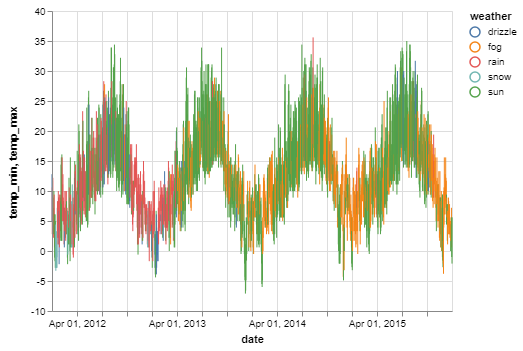

In [47]:
base = alt.Chart(weather).mark_rule().encode(
    x='date:T',
    y='temp_min:Q',
    y2='temp_max:Q',
    color='weather:N'
)

base

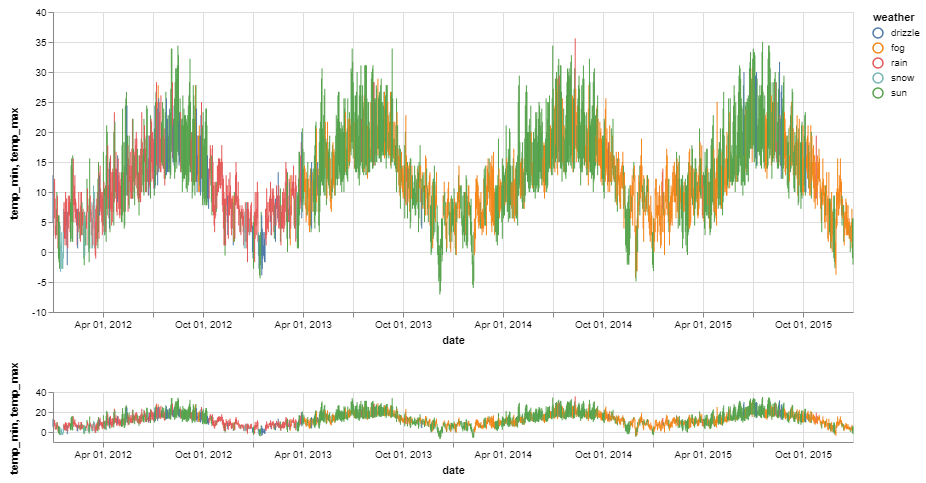

In [48]:
chart = base.properties(
    width=800,
    height=300
)

view = chart.properties(
    width=800,
    height=50
)

chart & view

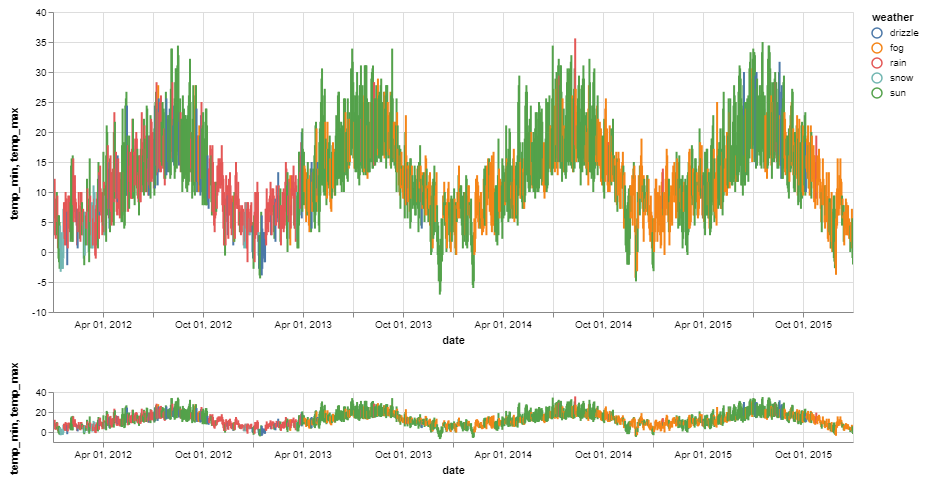

In [50]:
interval = alt.selection_interval(encodings=['x'])
# Here we are adding an selection interval in lower chartby which we can control the upper chart
base = alt.Chart(weather).mark_rule(size=2).encode(
    x='date:T',
    y='temp_min:Q',
    y2='temp_max:Q',
    color='weather:N'
)

chart = base.properties(
    width=800,
    height=300
).encode(
    x=alt.X('date:T', scale=alt.Scale(domain=interval.ref()))
)

view = chart.properties(
    width=800,
    height=50,
    selection=interval
)

chart & view

# Filtering by Selection

In [ ]:
# In multi-panel charts, we can use the result of 
# the selection to filter other views of the data. For example, here is a scatter-plot along with a histogram

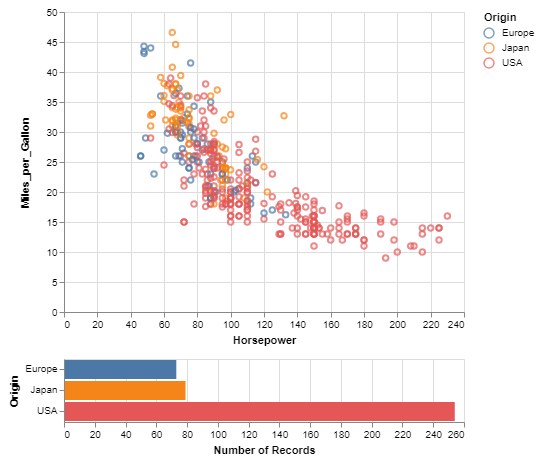

In [54]:
interval = alt.selection_interval()

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin:N', alt.value('lightgray'))
).properties(
    selection=interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).transform_filter(
    interval
)

scatter & hist

In [55]:
# Similarly, you can use a Multi selection to go the other way
# (allow clicking on the bar chart to filter the contents of the scatter plot. We'll add this to the previous chart:

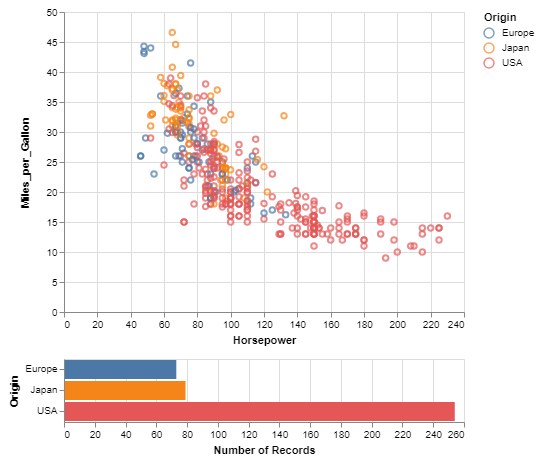

In [56]:
click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
).transform_filter(
    click
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color=alt.condition(click, 'Origin', alt.value('lightgray'))
).properties(
    selection=click
)

scatter & hist